In [1]:
# import standard python libraries
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 96
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, subprocess
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# import libraries for biological data analysis
from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting

In [3]:
data_dir = '/lustre/home/acct-medlqian/medlqian-loop3/data/Hi_C/20250520_Trim66_HiC_20250609_46G/merged_valid_pairs_cooler_cooltools_output'


In [4]:
Het_clr_50kb = cooler.Cooler(f'{data_dir}/Het/Het.valid_pairs.5000.zoomify.mcool::resolutions/50000')


In [5]:
view_df = pd.DataFrame({'chrom': Het_clr_50kb.chromnames,
                        'start': 0,
                        'end': Het_clr_50kb.chromsizes.values,
                        'name': Het_clr_50kb.chromnames}
                      )
display(view_df)

,chrom,start,end,name
0,chr1,0,195471971,chr1
1,chr2,0,182113224,chr2
2,chr3,0,160039680,chr3
3,chr4,0,156508116,chr4
4,chr5,0,151834684,chr5
...,...,...,...,...
61,JH584300.1,0,182347,JH584300.1
62,JH584301.1,0,259875,JH584301.1
63,JH584302.1,0,155838,JH584302.1
64,JH584303.1,0,158099,JH584303.1


In [7]:
GI_50kb_bins_pairs = pd.read_csv("../files/GI_50kb_bins_pairs.bedpe", sep="\t", header=None)
GI_50kb_bins_pairs.columns = [
    "chrom1", "start1", "end1", "chrom2", "start2", "end2", 
]
print(GI_50kb_bins_pairs)

     chrom1     start1       end1 chrom2     start2       end2
0      chr1   92500000   92550000   chr1  173150000  173200000
1      chr1   92500000   92550000   chr1  173200000  173250000
2      chr1   92500000   92550000   chr1  173250000  173300000
3      chr1   92500000   92550000   chr1  174000000  174050000
4      chr1   92500000   92550000   chr1  174300000  174350000
...     ...        ...        ...    ...        ...        ...
1648   chr7  140150000  140200000   chr9   37650000   37700000
1649   chr7  140150000  140200000   chr9   39950000   40000000
1650   chr9   19650000   19700000   chr9   37650000   37700000
1651   chr9   19650000   19700000   chr9   39950000   40000000
1652   chr9   37650000   37700000   chr9   39950000   40000000

[1653 rows x 6 columns]


In [8]:
Het_GI_trans_pileup = coolpup.pileup(Het_clr_50kb, GI_50kb_bins_pairs, features_format='bedpe', view_df=view_df,
                                     trans = True,
                    flank=500000)


/lustre/home/acct-medlqian/medlqian-loop3/.conda/envs/coolpup/lib/python3.11/site-packages/coolpuppy/coolpup.py:2156: UserWarning: Ignoring maxdist when using trans
  CC = CoordCreator(
INFO:coolpuppy:('chr1', 'chr2'): 30
INFO:coolpuppy:('chr1', 'chr3'): 12
INFO:coolpuppy:('chr1', 'chr4'): 42
INFO:coolpuppy:('chr1', 'chr6'): 18
INFO:coolpuppy:('chr1', 'chr7'): 54
INFO:coolpuppy:('chr1', 'chr9'): 18
INFO:coolpuppy:('chr1', 'chr10'): 18
INFO:coolpuppy:('chr1', 'chr11'): 48
INFO:coolpuppy:('chr1', 'chr13'): 12
INFO:coolpuppy:('chr1', 'chr14'): 24
INFO:coolpuppy:('chr1', 'chr15'): 6
INFO:coolpuppy:('chr1', 'chr16'): 12
INFO:coolpuppy:('chr1', 'chr17'): 6
INFO:coolpuppy:('chr1', 'chr19'): 12
INFO:coolpuppy:('chr2', 'chr3'): 10
INFO:coolpuppy:('chr2', 'chr4'): 35
INFO:coolpuppy:('chr2', 'chr6'): 15
INFO:coolpuppy:('chr2', 'chr7'): 45
INFO:coolpuppy:('chr2', 'chr9'): 14
INFO:coolpuppy:('chr2', 'chr10'): 15
INFO:coolpuppy:('chr2', 'chr11'): 40
INFO:coolpuppy:('chr2', 'chr13'): 10
INFO:coolpupp

In [9]:
display(Het_GI_trans_pileup)

,group,data,n,num,clr,resolution,flank,rescale_flank,chroms,minshift,...,flip_negative_strand,ignore_diags,store_stripes,nproc,ignore_group_order,by_window,by_strand,by_distance,groupby,cooler
0,all,"[[2.662367997844172e-05, 2.7321327534685048e-0...",1396,"[[1312.0, 1258.0, 1303.0, 1304.0, 1309.0, 1280...",/lustre/home/acct-medlqian/medlqian-loop3/data...,50000,500000,None,"['chr1', 'chr2', 'chr3', 'chr4', 'chr6', 'chr7...",100000,...,False,2,False,1,False,False,False,False,[],Het.valid_pairs.5000.zoomify


In [10]:
Het_pixels_50kb = Het_clr_50kb.pixels()[:]
Het_bins_50kb = Het_clr_50kb.bins()[:]
Het_w_50kb = Het_bins_50kb["weight"].values

Het_bin1_w_50kb = Het_w_50kb[Het_pixels_50kb["bin1_id"].values]
Het_bin2_w_50kb = Het_w_50kb[Het_pixels_50kb["bin2_id"].values]
Het_balanced_count_50kb = Het_pixels_50kb["count"].values * Het_bin1_w_50kb * Het_bin2_w_50kb

Het_total_balanced_count_50kb = np.nansum(Het_balanced_count_50kb)
print(Het_total_balanced_count_50kb)

32713.819249532262


In [11]:
Het_GI_trans_pileup_rpb_matrix = Het_GI_trans_pileup["data"].iloc[0] / Het_total_balanced_count_50kb * 1e9

np.float64(4.952239475168342)

In [13]:
def symmetrize_apa(mat):
    """对矩阵进行8方向翻转并求平均，实现APA对称化"""
    mats = [
        mat,
        np.flipud(mat),
        np.fliplr(mat),
        np.transpose(mat),
        np.flipud(np.fliplr(mat)),
        np.flipud(np.transpose(mat)),
        np.fliplr(np.transpose(mat)),
        np.flipud(np.fliplr(np.transpose(mat)))
    ]
    return np.nanmean(mats, axis=0)


In [14]:
sym_Het_GI = symmetrize_apa(Het_GI_trans_pileup_rpb_matrix)


In [20]:
center = sym_Het_GI.shape[0] // 2
np.mean(sym_Het_GI[center - 1:center + 2, center - 1:center + 2])


np.float64(4.9522394751683425)

In [19]:
def center_vs_edge_zscore(matrix, window=1):
    center = matrix.shape[0] // 2
    center_region = matrix[center - window:center + window + 1,
                           center - window:center + window + 1]
    center_mean = np.mean(center_region)

    mask = np.ones(matrix.shape, dtype=bool)
    mask[center - window:center + window + 1,
         center - window:center + window + 1] = False
    edge_values = matrix[mask]

    edge_mean = np.mean(edge_values)
    edge_std = np.std(edge_values)

    return (center_mean - edge_mean) / edge_std

center_vs_edge_zscore(sym_Het_GI)


np.float64(7.113803530443998)

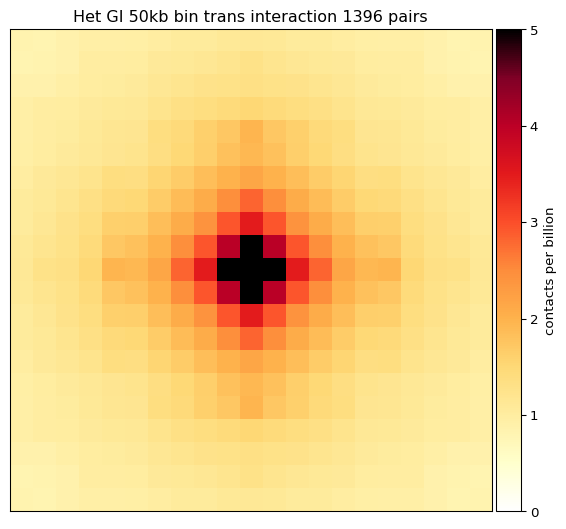

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

flank = 500000
resolution = 50000

fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(
    sym_Het_GI,
    vmax=5,
    vmin=0,
    cmap='fall',
    interpolation='none'
)

# 去掉 x/y 轴刻度和标签
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Het GI 50kb bin trans interaction 1396 pairs')

# 创建 colorbar，与主图同高
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('contacts per billion')

plt.tight_layout()
plt.savefig('../plots_v1/sym_Het_GI_trans_interaction_pileup_heatmap.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [24]:
Homo_clr_50kb = cooler.Cooler(f'{data_dir}/Homo/Homo.valid_pairs.5000.zoomify.mcool::resolutions/50000')


In [25]:
Homo_GI_trans_pileup = coolpup.pileup(Homo_clr_50kb, GI_50kb_bins_pairs, features_format='bedpe', view_df=view_df,
                                     trans = True,
                    flank=500000)


/lustre/home/acct-medlqian/medlqian-loop3/.conda/envs/coolpup/lib/python3.11/site-packages/coolpuppy/coolpup.py:2156: UserWarning: Ignoring maxdist when using trans
  CC = CoordCreator(
INFO:coolpuppy:('chr1', 'chr2'): 30
INFO:coolpuppy:('chr1', 'chr3'): 12
INFO:coolpuppy:('chr1', 'chr4'): 42
INFO:coolpuppy:('chr1', 'chr6'): 18
INFO:coolpuppy:('chr1', 'chr7'): 54
INFO:coolpuppy:('chr1', 'chr9'): 18
INFO:coolpuppy:('chr1', 'chr10'): 18
INFO:coolpuppy:('chr1', 'chr11'): 48
INFO:coolpuppy:('chr1', 'chr13'): 12
INFO:coolpuppy:('chr1', 'chr14'): 24
INFO:coolpuppy:('chr1', 'chr15'): 6
INFO:coolpuppy:('chr1', 'chr16'): 12
INFO:coolpuppy:('chr1', 'chr17'): 6
INFO:coolpuppy:('chr1', 'chr19'): 12
INFO:coolpuppy:('chr2', 'chr3'): 10
INFO:coolpuppy:('chr2', 'chr4'): 35
INFO:coolpuppy:('chr2', 'chr6'): 15
INFO:coolpuppy:('chr2', 'chr7'): 45
INFO:coolpuppy:('chr2', 'chr9'): 14
INFO:coolpuppy:('chr2', 'chr10'): 15
INFO:coolpuppy:('chr2', 'chr11'): 40
INFO:coolpuppy:('chr2', 'chr13'): 10
INFO:coolpupp

In [26]:
display(Homo_GI_trans_pileup)

,group,data,n,num,clr,resolution,flank,rescale_flank,chroms,minshift,...,flip_negative_strand,ignore_diags,store_stripes,nproc,ignore_group_order,by_window,by_strand,by_distance,groupby,cooler
0,all,"[[1.567265549558171e-05, 1.6231184061266565e-0...",1396,"[[1327.0, 1285.0, 1298.0, 1299.0, 1304.0, 1296...",/lustre/home/acct-medlqian/medlqian-loop3/data...,50000,500000,None,"['chr1', 'chr2', 'chr3', 'chr4', 'chr6', 'chr7...",100000,...,False,2,False,1,False,False,False,False,[],Homo.valid_pairs.5000.zoomify


In [27]:
Homo_pixels_50kb = Homo_clr_50kb.pixels()[:]
Homo_bins_50kb = Homo_clr_50kb.bins()[:]
Homo_w_50kb = Homo_bins_50kb["weight"].values

Homo_bin1_w_50kb = Homo_w_50kb[Homo_pixels_50kb["bin1_id"].values]
Homo_bin2_w_50kb = Homo_w_50kb[Homo_pixels_50kb["bin2_id"].values]
Homo_balanced_count_50kb = Homo_pixels_50kb["count"].values * Homo_bin1_w_50kb * Homo_bin2_w_50kb

Homo_total_balanced_count_50kb = np.nansum(Homo_balanced_count_50kb)
print(Homo_total_balanced_count_50kb)

33178.90407152158


In [30]:
Homo_GI_trans_pileup_rpb_matrix = Homo_GI_trans_pileup["data"].iloc[0] / Homo_total_balanced_count_50kb * 1e9

In [32]:
sym_Homo_GI = symmetrize_apa(Homo_GI_trans_pileup_rpb_matrix)
center = sym_Homo_GI.shape[0] // 2
np.mean(sym_Homo_GI[center - 1:center + 2, center - 1:center + 2])


np.float64(0.9268398488015275)

In [33]:
center_vs_edge_zscore(sym_Homo_GI)


np.float64(4.13036201412392)

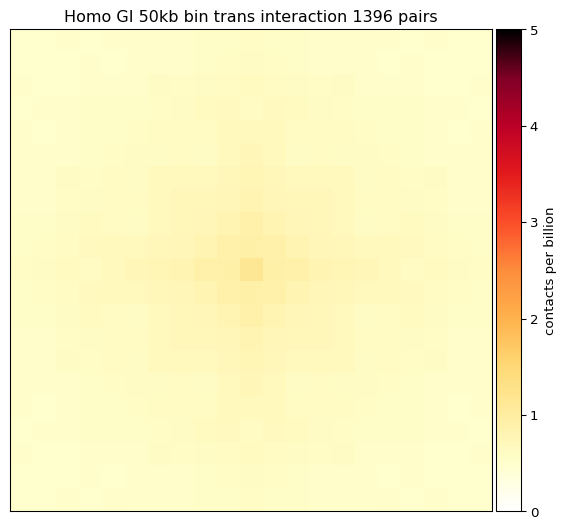

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

flank = 500000
resolution = 50000

fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(
    sym_Homo_GI,
    vmax=5,
    vmin=0,
    cmap='fall',
    interpolation='none'
)

# 去掉 x/y 轴刻度和标签
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Homo GI 50kb bin trans interaction 1396 pairs')

# 创建 colorbar，与主图同高
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('contacts per billion')

plt.tight_layout()
plt.savefig('../plots_v1/sym_Homo_GI_trans_interaction_pileup_heatmap.pdf', dpi=300, bbox_inches='tight')
plt.show()
